<a href="https://colab.research.google.com/github/Sakshee5/XAI-Assignments/blob/explainable-deep-learning/Explainable_Deep_Learning_Assignment_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# REPORT

# **Investigating Model Bias - Background/Environment vs. Object Features**

## **Aim**
I am aiming to investigate potential bias in the ResNet50 model's interpretation of real-world scenes, especially with ditsinct environmental features. For example, here I am specifically focusing on "Arabian camel" images from the ImageNet dataset that have a distinctive "desert" background. The hypothesis examines whether the model relies more on environmental cues, such as deserts, than on the camel itself when making predictions.

## **Hypothesis**
- **H0 (Null Hypothesis)**: The ResNet50 model does not show a difference in its reliance on object-specific features compared to desert backgrounds when classifying images of "camels" in the ImageNet-V2 dataset.

- **H1 (Alternative Hypothesis)**: The ResNet50 model shows a difference in its reliance on desert backgrounds compared to object-specific features when classifying images of "camels" in the ImageNet-V2 dataset, i.e., it favors sandy or barren landscapes over the camels physical attributes.


## **Experimental Methods**
- ### Saliency Maps:
Saliency maps will be generated to visualize the pixels on which the ResNet50 model focuses when identifying camels. These maps help identify which pixels were weighted higher when making the prediction.

- ### Occlusion Sensitivity:
Here we occlude parts of the camel and the background in the images and measure the impact on the models classification confidence. By comparing occluded versions of images, we determine whether the removal of environmental features affects classification as much as removing parts of the camel itself.


## **Dataset**
I will use 3 images from the ImageNetV2 dataset from Class 354 - Arabian Camel. The images depict camels in various environments, picture one is a zoomed out view of a camel, picture 2 contains multiple camels on a sunny desert and third picture is a relatively zoomed in image of the camel to understand which physical attributes of the camel (if any) are used by ResNet to make the predictions.
<br>
<br>
![A camel is visible in a semi-urban environment with palm trees and stone structures.](https://drive.google.com/uc?export=view&id=1roR_upq1tFqRN6PwabS5ptziwSoOMfIU)

![This image depicts camels walking in a desert environment with sand dunes.](https://drive.google.com/uc?export=view&id=1jc56fGYII3TzMI-TaNLzQrOj86VwrN_q)

![A close-up of a camel's head lying on sandy ground.](https://drive.google.com/uc?export=view&id=10Z3txOFrUtieLIfnPlfsp76-dytqHNXl)

## Results
###  Occlusion Sensitivity

**Interpreting Occlusion Sensitivity Heatmap**

It represents the sensitivity of the model to each part of the image:

Low values (darker areas) indicate that occluding these regions causes a significant drop in confidence, meaning they are crucial for classification.
High values (brighter areas) indicate that the models confidence remains high despite occlusion, suggesting that those regions are less important.

#### Image 1: A camel is visible in a semi-urban environment with palm trees and stone structures.

![Occlusion Sensitivity Results](https://drive.google.com/uc?export=view&id=1Nj1x2Z-YH3BZqUG1kJEyObHUmS1m0wOb)

**Occlusion Sensitivity Heatmap**: The heatmap shows higher sensitivity (darker areas) around the camel's body and legs. However, the surrounding palm trees and background stone structures also demonstrate some sensitivity, indicating they play a role in the model's classification decision.

**Top 20 Important Patches**: The highlighted patches correspond to the camel's legs and body, which shows that these features are crucial for classification. However, patches also appear around the environment, suggesting that the model partially relies on contextual elements.


#### Image 2: This image depicts camels walking in a desert environment with sand dunes.

![Occlusion Sensitivity Results](https://drive.google.com/uc?export=view&id=1M1P7xOQ9Ckepn7oPKnuMC0U196fYUdGB)

**Occlusion Sensitivity Heatmap:** The heatmap is mostly bright (low sensitivity), except for a small dark spot on a few camel legs and sand, suggesting that the models confidence remains stable despite occluding most of the desert background.

**Top 20 Important Patches:** The patches highlight portions of the sandy environment as well as the sky with a few camel legs rather than focusing entirely on the camels, which further supports the hypothesis that the model may rely on desert cues.


#### Image 3: A close-up of a camels head lying on sandy ground.

![Occlusion Sensitivity Results](https://drive.google.com/uc?export=view&id=1wwqH9CZuBQACVfW7Q7h1O6Er7kMIP994)

**Occlusion Sensitivity Heatmap:** Darker areas (high sensitivity) are concentrated randomly around the camels visible body, suggesting that the model recognizes camel-specific features more effectively in this instance. The background sand shows low sensitivity, implying its lesser importance for classification. However, random elements of the camel (e.g., fur) are important, but not key features like eyes. This may imply that minimal information is needed for correct classification due to clear distinguishing features or inherent model confidence.

**Top 20 Important Patches:** These patches focus almost exclusively on the camel's head and surrounding facial features.

### Saliency Maps
**Image 1: Saliency Map**

![Saliency Map Results](https://drive.google.com/uc?export=view&id=1Ji-JNCK92euXpwtdIXpkfi7kTsk6x4Tj)

The saliency map shows dispersed activation, with some focus on the camel and other attention on the surrounding environment. This mixed focus supports the idea that the model might be relying on context (e.g., the presence of palm trees and structures) when classifying this as a camel.


**Image 2: Saliency Map:**

![Saliency Map Results](https://drive.google.com/uc?export=view&id=1QQW_sdhrcTHetGljzgSeEUNSYvsP-QPn)

The saliency map for this desert scene shows distributed activation across the image, with little concentrated focus on the camels. This dispersed attention indicates that the model uses environmental cues, like the presence of sand dunes and barren land, as an indicator of the "Arabian camel" class, potentially confirming the model's bias towards background elements.

**Image 3: Saliency Map:**

![Saliency Map Results](https://drive.google.com/uc?export=view&id=1_8Rb6vyijEf6TCvIAAe-w-hZpAnm1pQ6)

Unlike the previous maps, this saliency map shows almost no activation. The absence of strong activations in the saliency map, despite the correct classification, suggests that the model may be leveraging very fine-grained or distributed visual cues. What I can conclude here that the model can still identify the object even when the prominent environmental context is not available, though it may not be as confident in highlighting specific features. Looks like low feature complexity is required for recognition.

## Summary of Findings
The results from both the occlusion sensitivity maps and saliency maps provide evidence of slight bias in the ResNet50 model:

### Bias Towards Environmental Cues:
In images where camels are situated in desert landscapes, the model shows a varying preference for the background features (sand dunes, barren land) and the camels themselves. This pattern suggests that the model may associate the "Arabian camel" class with desert features (significance of this association is subjective)

### Object-Specific Focus in Close-Ups:
When the camels features are clearly visible and occupy most of the frame (as in Image 3), the model correctly identifies the camels features. However, the absence of a clear saliency map in this scenario indicates that the model may not perform as well without the typical environmental context.

## Conclusion:
The study supports the alternative hypothesis (H1), showing that the ResNet50 models classification of "Arabian camel" is somewhat influenced by the environmental context, particularly desert landscapes. This highlights a bias where the model may favor background cues rather than focusing on the object-specific details of camels, especially when the environment is distinct (like a desert or barren land).

# CODE DEMO

** The markdown interpretation of the saliency maps and occlusion sensitivity is the same as the report above.


# Install and Import Necessary Libraries

In [1]:
!pip install numpy==1.25.2 matplotlib==3.7.1 tensorflow==2.14.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 26.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 489.9/489.9 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 21.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 3.1 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.16.0
    Uninstalling wrapt-1.16.0:
      Successfully uninstalled wrapt-1.16.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import os
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing import image
from keras.utils import get_file
import json

# Download Data and Pre-trained Model
We will load the pre-trained model, [ResNet50](https://www.tensorflow.org/api_docs/python/tf/keras/applications/ResNet50) and test a subset of 'Arabian Camel' images from the [ImageNetV2](https://www.tensorflow.org/datasets/catalog/imagenet_v2) dataset.



In [ ]:
# Load ResNet50 pre-trained model and ImageNet dataset and class index file
model = tf.keras.applications.ResNet50(weights='imagenet', include_top=True)
dataset, info = tfds.load('imagenet_v2', with_info=True, split="test", as_supervised=True)

class_index_path = get_file('imagenet_class_index.json', 'https://storage.googleapis.com/download.tensorflow.org/data/imagenet_class_index.json')
with open(class_index_path) as f:
    class_idx = json.load(f)

# Find the class label corresponding to index 354 which is the class of interest i.e., Arabian Camel
arabian_camel_label = 'dromedary'

# Filter the dataset for images of the Arabian camel
arabian_camel_images = dataset.filter(lambda img, label: tf.equal(label, 354))

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imagenet_v2/matched-frequency/incomplete.58UNN1_3.0.0/imagenet_v2-test.tfr…

Dataset imagenet_v2 downloaded and prepared to /root/tensorflow_datasets/imagenet_v2/matched-frequency/3.0.0. Subsequent calls will reuse this data.
35363/35363 [==============================] - 0s 0us/step


# Visualize a subset of relevant images

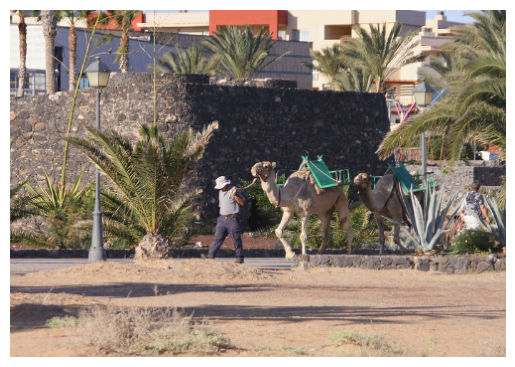

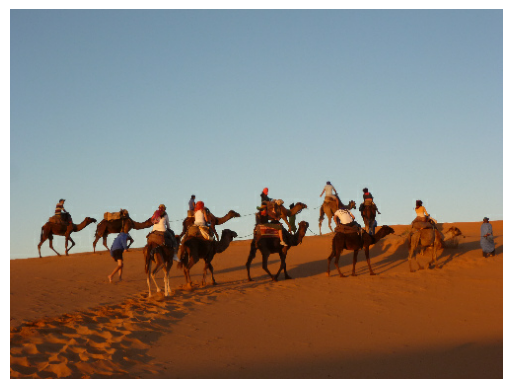

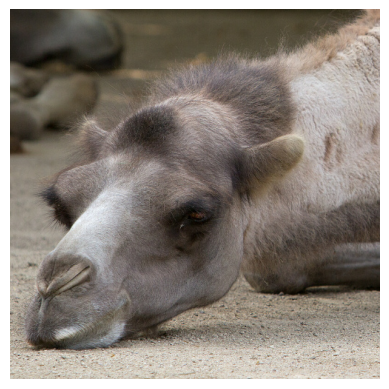

In [ ]:
# Create a folder named 'data' to begin with
if not os.path.exists('data'):
    os.makedirs('data')

# a list to hold the selected images
selected_images = []

# Choosing specific images (img1, img2, img10) since they allow us to investigate different image types. Selected after visualizing all images
for i, (img, label) in enumerate(arabian_camel_images):
    if i in [0, 1, 9]:  # Indices for img1, img2, img10
        selected_images.append(img)

        # Plot the image
        plt.imshow(img)
        plt.axis('off')

        # Save the image to the 'data' folder so as to be used in the report later
        plt.savefig(f'data/selected_image_{i}.png', bbox_inches='tight', pad_inches=0)
        plt.show()

# Pre-Process and Predict

In [ ]:
def preprocess_image(img):
  img = tf.image.resize(img, (224, 224))
  img = img.numpy().astype(np.float32)

  # Normalize the image for the ResNet50 model
  img = tf.keras.applications.resnet50.preprocess_input(img)

  # Expand dimensions to match the model input shape
  img = np.expand_dims(img, axis=0)

  return img

In [ ]:
# Predict confidence scores for each image using ResNet50
for no, img in enumerate(selected_images):
  img_processed = preprocess_image(img)
  preds = model.predict(img_processed)
  predicted_class = class_idx[str(np.argmax(preds))][1]
  print(f'Image Number: Image {no}')
  print(f"Predicted object class: {predicted_class}")
  print(f"Confidence score: {np.max(preds)}")

1/1 [==============================] - 2s 2s/step
Image Number: Image 0
Predicted object class: Arabian_camel
Confidence score: 0.3082542419433594
1/1 [==============================] - 0s 239ms/step
Image Number: Image 1
Predicted object class: Arabian_camel
Confidence score: 0.9997033476829529
1/1 [==============================] - 0s 261ms/step
Image Number: Image 2
Predicted object class: Arabian_camel
Confidence score: 0.7939702272415161


# Saliency Maps

Reference: https://github.com/AIPI-590-XAI/Duke-AI-XAI/blob/main/explainable-ml-example-notebooks/saliency_maps.ipynb

In [ ]:
# Function to generate a saliency map for an input image based on a given model

def generate_saliency_map(model, img):
    # Convert the input image to a TensorFlow variable
    x = tf.Variable(img)

    # Create a gradient tape context to record operations for automatic differentiation
    with tf.GradientTape() as tape:
        # Watch the input tensor to calculate gradients
        tape.watch(x)

        # Forward pass: get model predictions for the input image
        preds = model(x)

        # Find the index of the highest predicted class probability
        top_pred_index = tf.argmax(preds[0])

    # Calculate the gradients of the top prediction with respect to the input image
    grads = tape.gradient(preds, x)

    # Compute the saliency map by taking the maximum absolute gradient across color channels
    saliency = tf.reduce_max(tf.abs(grads), axis=-1)[0]

    # Return the saliency map and the index of the top predicted class as a numpy array
    return saliency, top_pred_index.numpy()

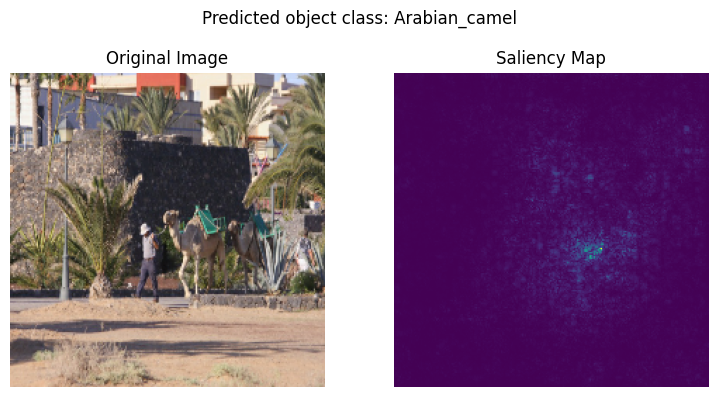

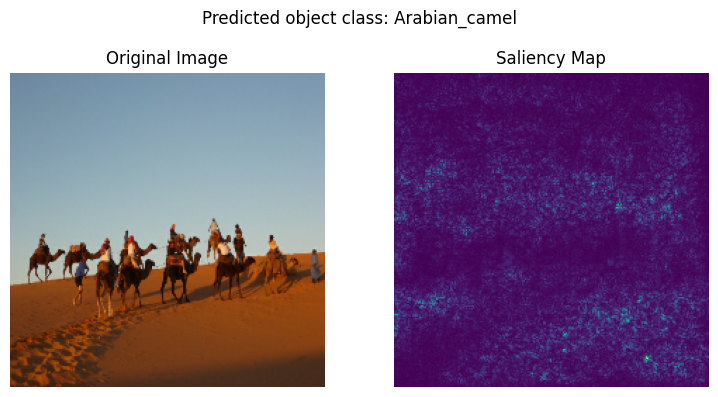

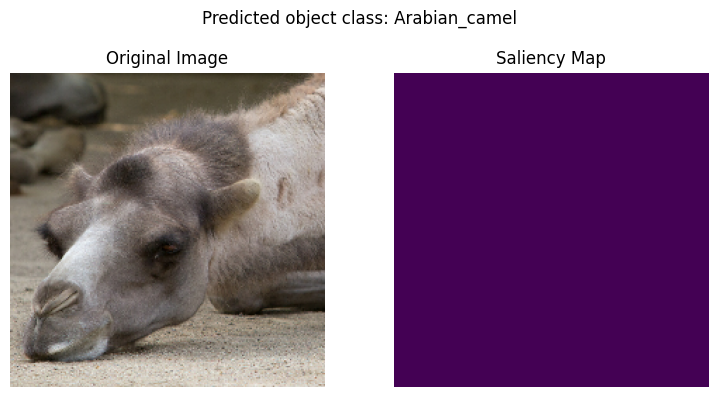

In [ ]:
for i, img in enumerate(selected_images):
    # Generate saliency map
    saliency_map, top_pred_index = generate_saliency_map(model, preprocess_image(img))

    # Map the index to class label
    predicted_class = class_idx[str(top_pred_index)][1]

    # Display the original image
    plt.figure(figsize=(8, 4))

    plt.subplot(1, 2, 1)
    plt.title('Original Image')
    plt.imshow(cv2.resize(img.numpy(), (224, 224)))
    plt.axis('off')
    plt.tight_layout()

    # Display the saliency map
    plt.subplot(1, 2, 2)
    plt.imshow(saliency_map, cmap='viridis')
    plt.title("Saliency Map")
    plt.suptitle(f"Predicted object class: {predicted_class}")
    plt.axis('off')
    plt.tight_layout()

    # Save the results to the 'data' folder so as to be used in the report later
    plt.savefig(f'data/saliency_map_{i}.png', bbox_inches='tight', pad_inches=0)

    plt.show()

# Saliency Map Interpretation

**Image 1: Saliency Map** The saliency map shows dispersed activation, with some focus on the camel and other attention on the surrounding environment. This mixed focus supports the idea that the model might be relying on context (e.g., the presence of palm trees and structures) when classifying this as a camel.

**Image 2: Saliency Map:** The saliency map for this desert scene shows distributed activation across the image, with little concentrated focus on the camels. This dispersed attention indicates that the model uses environmental cues, like the presence of sand dunes and barren land, as an indicator of the "Arabian camel" class, potentially confirming the model's bias towards background elements.

**Image 3: Saliency Map:**
Unlike the previous maps, this saliency map shows almost no activation The absence of strong activations in the saliency map, despite the correct classification, suggests that the model may be leveraging very fine-grained or distributed visual cues. It could be due to inherent model confidence or low feature complexity required for recognition.

# Occlusion Sensitivity

In [ ]:
def occlusion_sensitivity(model, ori_img, img, label_index, occlusion_size=20, stride=10, top_n=20):
    """
    Computes occlusion sensitivity by masking parts of the image and measuring the change in prediction confidence.

    Parameters:
    - model: The pre-trained model (e.g., ResNet50).
    - img: The input image (preprocessed and in the shape (224, 224, 3)).
    - label_index: Index of the class label we want to measure confidence for.
    - occlusion_size: The size of the occluding square patch.
    - stride: The number of pixels to move the patch at each step.
    """
    # Initialize
    heatmap = np.zeros((img.shape[0], img.shape[1]))

    # Get confidence score for entire image for comparison with confidence scores of occluded images
    original_confidence = model.predict(np.expand_dims(img, axis=0))[0][label_index]

    confidence_drops = []

    for y in range(0, img.shape[0], stride):
        for x in range(0, img.shape[1], stride):
            # Make a copy of the image and occlude a patch
            occluded_img = img.copy()
            occluded_img[y:y+occlusion_size, x:x+occlusion_size, :] = 0  # Set patch to black

            # Preprocess and predict with the occluded image
            occluded_img_input = np.expand_dims(occluded_img, axis=0)
            preds = model.predict(occluded_img_input, verbose=0)

            # Get the confidence score for specified label
            confidence = preds[0][label_index]
            heatmap[y:y+occlusion_size, x:x+occlusion_size] = confidence

            # Calculate drop in confidence
            confidence_drop = original_confidence - confidence

            confidence_drops.append((confidence_drop, (y, x)))

    confidence_drops.sort(key=lambda x: x[0], reverse=True)

    # Get top N patches for visualization purposes
    top_patches = confidence_drops[:top_n]
    white_background = np.ones_like(ori_img) * 255

    for _, (y, x) in top_patches:
        patch = ori_img[y:y+occlusion_size, x:x+occlusion_size, :]
        white_background[y:y+occlusion_size, x:x+occlusion_size, :] = patch

    return heatmap, white_background

0it [00:00, ?it/s]

1/1 [==============================] - 0s 213ms/step


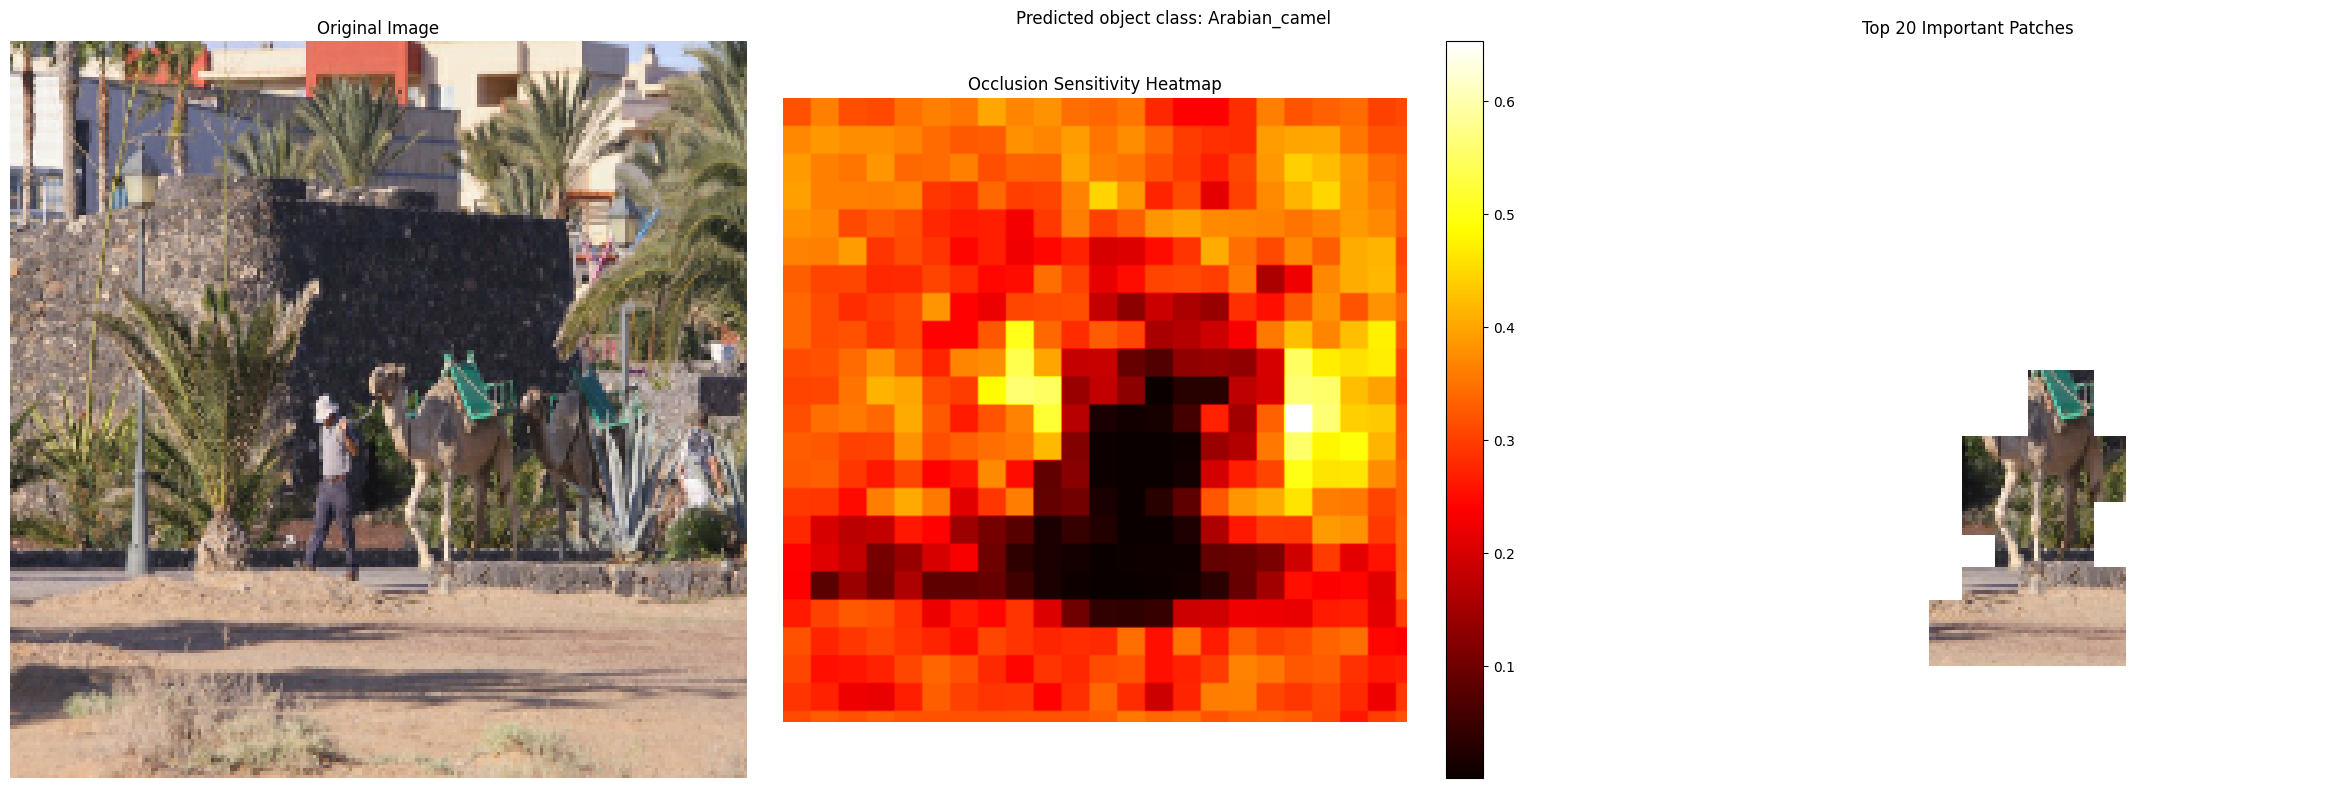

1it [02:33, 153.97s/it]

1/1 [==============================] - 0s 365ms/step


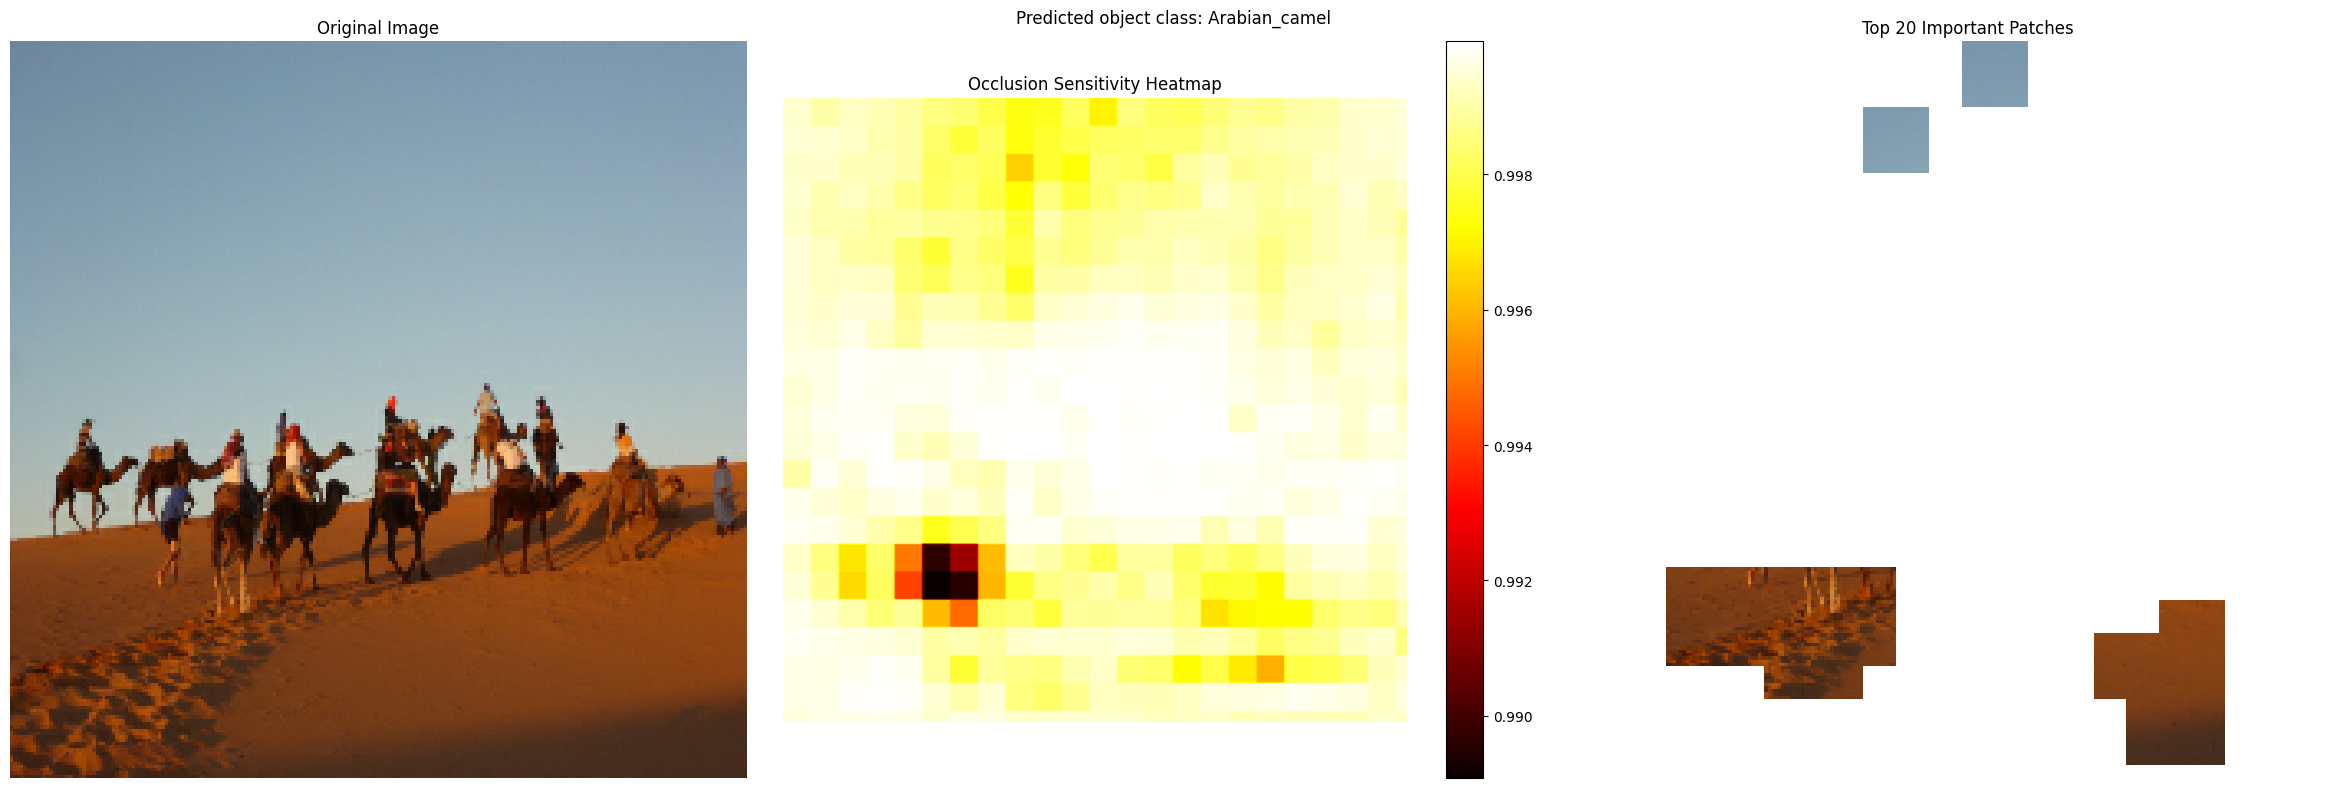

2it [05:07, 153.53s/it]

1/1 [==============================] - 0s 206ms/step


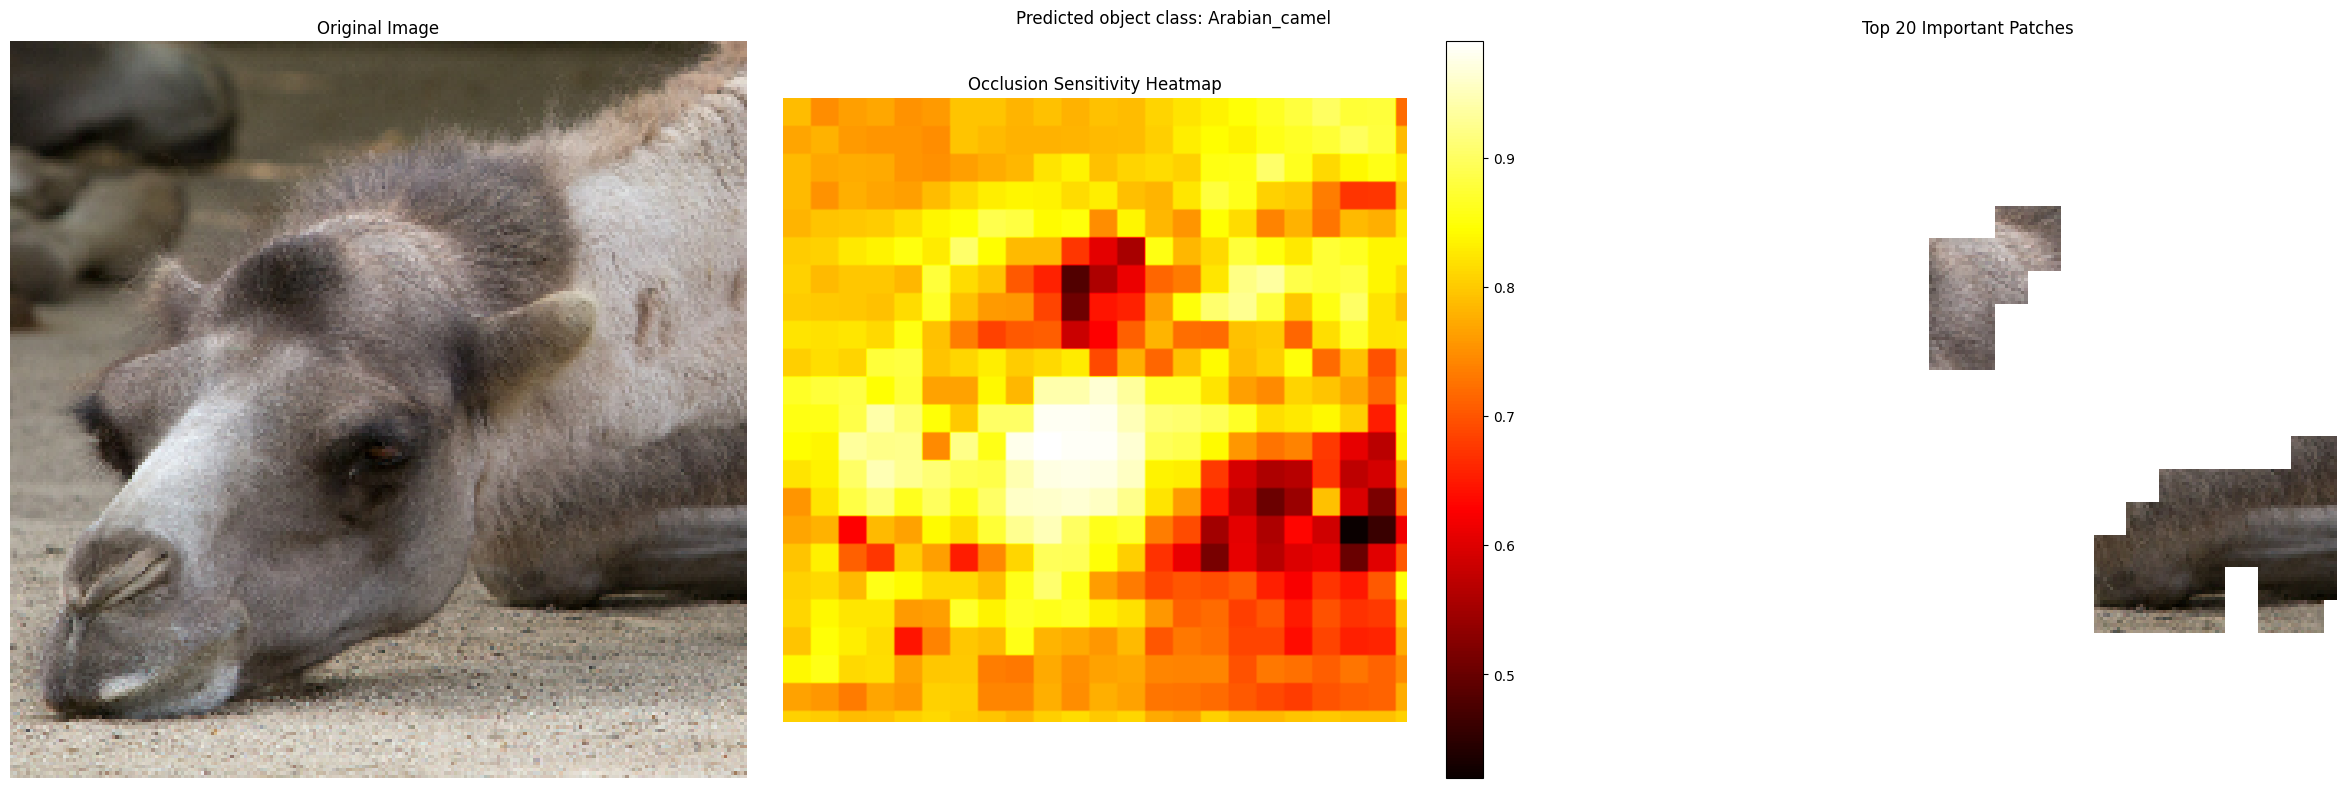

3it [07:37, 152.59s/it]


In [ ]:
from tqdm import tqdm

for i, img in tqdm(enumerate(selected_images)):
    # Preprocess the image for prediction (224, 224, 3)
    img_resized = cv2.resize(np.array(img), (224, 224)).astype(np.float32)
    img_processed = tf.keras.applications.resnet50.preprocess_input(img_resized)

    # Predict class
    preds = model.predict(preprocess_image(img))
    label_index = np.argmax(preds)
    predicted_class = class_idx[str(label_index)][1]

    # Compute the occlusion sensitivity heatmap
    heatmap, top_patches_img = occlusion_sensitivity(model, cv2.resize(np.array(img), (224, 224)), img_processed, label_index)

    # Subplots for visualizations
    fig, ax = plt.subplots(1, 3, figsize=(24, 8))  # 1 row, 3 columns

    ax[0].imshow(cv2.resize(img.numpy(), (224, 224)))  # Display the original image
    ax[0].set_title('Original Image')
    ax[0].axis('off')

    ax[1].imshow(heatmap, cmap='hot')
    ax[1].set_title('Occlusion Sensitivity Heatmap')
    ax[1].axis('off')
    plt.colorbar(ax[1].imshow(heatmap, cmap='hot'), ax=ax[1])

    ax[2].imshow(top_patches_img.astype(np.uint8))
    ax[2].set_title('Top 20 Important Patches')
    ax[2].axis('off')
    plt.suptitle(f"Predicted object class: {predicted_class}")

    plt.tight_layout()  # Adjusting layout to prevent overlap

    # Save the results to the 'data' folder so as to be used in the report later
    plt.savefig(f'data/occlusion_results_{i}.png', bbox_inches='tight', pad_inches=0)
    plt.show()

# Interpreting Occlusion Sensitivity Heatmap
It represents the sensitivity of the model to each part of the image:

Low values (darker areas) indicate that occluding these regions causes a significant drop in confidence, meaning they are crucial for classification.
High values (brighter areas) indicate that the models confidence remains high despite occlusion, suggesting that those regions are less important.

# Interpreting the overall Results
#### Image 1: A camel is visible in a semi-urban environment with palm trees and stone structures.

**Occlusion Sensitivity Heatmap**: The heatmap shows higher sensitivity (darker areas) around the camel's body and legs. However, the surrounding palm trees and background stone structures also demonstrate some sensitivity, indicating they play a role in the model's classification decision.

**Top 20 Important Patches**: The highlighted patches correspond to the camel's legs and body, which shows that these features are crucial for classification. However, patches also appear around the environment, suggesting that the model partially relies on contextual elements.

#### Image 2: This image depicts camels walking in a desert environment with sand dunes.

**Occlusion Sensitivity Heatmap:** The heatmap is mostly bright (low sensitivity), except for a small dark spot on one camels hump, suggesting that the models confidence remains stable despite occluding most of the desert background. This indicates that the model may be biased towards identifying the desert environment rather than the camel itself.

**Top 20 Important Patches:** The patches highlight portions of the sandy environment rather than focusing entirely on the camels, which further supports the hypothesis that the model may rely on desert cues.


#### Image 3: A close-up of a camels head lying on sandy ground.

**Occlusion Sensitivity Heatmap:** Darker areas (high sensitivity) are concentrated around the camels head, suggesting that the model recognizes camel-specific features more effectively in this instance. The background sand shows low sensitivity, implying its lesser importance for classification. However, random elements of the camel (e.g., fur) are important, but not key features like eyes. This may imply that minimal information is needed for correct classification due to clear distinguishing features or inherent model confidence.

**Top 20 Important Patches:** These patches focus almost exclusively on the camel's head and surrounding facial features.